# 00. Introduction to Machine Learning 🤖

Welcome to your journey into machine learning! Before we dive into PyTorch and neural networks, let's build a solid foundation by understanding what machine learning is, why it's powerful, and how it works.

By the end of this notebook, you'll understand:

- 🎯 **What machine learning is** and how it differs from traditional programming
- 📊 **Types of machine learning** (supervised, unsupervised, reinforcement)
- 🔄 **The machine learning workflow** from data to deployment
- 🧠 **Why neural networks are special** and when to use them
- 🚀 **Where PyTorch fits in** and why we're learning it

Let's start this exciting journey! 🚀


## What is Machine Learning? 🤔

**Traditional Programming vs Machine Learning**

In traditional programming, we write explicit rules:

```
Input + Program (Rules) → Output
```

In machine learning, we learn the rules from data:

```
Input + Output → Program (Learned Rules)
```

### 🎯 Real-World Example: Email Spam Detection

**Traditional Programming Approach:**

```python
def is_spam(email):
    if "viagra" in email.lower():
        return True
    elif "lottery" in email.lower():
        return True
    elif email.count("!") > 5:
        return True
    else:
        return False
```

**Problems with this approach:**

- Hard to think of all possible spam patterns
- Spammers can easily circumvent rules
- Requires constant manual updates

**Machine Learning Approach:**

- Show the computer thousands of emails labeled as "spam" or "not spam"
- Let the algorithm learn patterns automatically
- The model adapts and improves with more data

**Machine learning shines when:**

- 📊 **Complex patterns**: Too many variables to manually program
- 🔄 **Changing conditions**: Patterns evolve over time
- 🎯 **Large scale**: Too much data for humans to process
- 🔍 **Hidden insights**: Patterns humans can't see


In [33]:
# Let's start with some imports we'll need for this notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Set style for better-looking plots
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

print("📚 Libraries imported successfully!")
print("🎨 Plotting style configured")
print("✅ Ready to explore machine learning!")

📚 Libraries imported successfully!
🎨 Plotting style configured
✅ Ready to explore machine learning!


## Types of Machine Learning 📚

There are three main types of machine learning, each suited for different types of problems:


### 1. Supervised Learning 👨‍🏫

**Definition**: Learning with a "teacher" - we have input-output pairs to learn from.

**Types:**

- **Classification**: Predicting categories (spam/not spam, cat/dog)
- **Regression**: Predicting continuous values (house prices, temperature)

**Examples:**

- 📧 Email spam detection
- 🏠 House price prediction
- 🩺 Medical diagnosis
- 📈 Stock price forecasting
- 🎬 Movie recommendation ratings

<img src="../09_images/00_classification_regression.png" alt="Classification vs Regression" width="1100">


### 2. Unsupervised Learning 🔍

**Definition**: Learning without a "teacher" - we only have inputs, no target outputs.

**Goal**: Find hidden patterns or structure in data.

**Types:**

- **Clustering**: Grouping similar data points
- **Dimensionality Reduction**: Simplifying data while preserving information
- **Association Rules**: Finding relationships ("people who buy X also buy Y")

**Examples:**

- 🛒 Customer segmentation for marketing
- 🎵 Music recommendation (find similar songs)
- 🧬 Gene analysis (group similar genes)
- 📊 Data compression and visualization
- 🔍 Anomaly detection (fraud, network intrusion)

<img src="../09_images/00_clustering.png" alt="Clustering" width="1100">


### 3. Reinforcement Learning 🎮

**Definition**: Learning through interaction with an environment, receiving rewards or penalties.

**Key Concepts:**

- **Agent**: The learner (AI player)
- **Environment**: The world the agent interacts with
- **Actions**: What the agent can do
- **Rewards**: Feedback for actions (positive or negative)
- **Goal**: Maximize total reward over time

**Examples:**

- 🎮 Game playing (Chess, Go, video games)
- 🚗 Autonomous driving
- 🤖 Robot control and navigation
- 💰 Trading algorithms
- 🎯 Recommendation systems (optimizing user engagement)

**Simple Example - Learning to Play Tic-Tac-Toe:**

```
1. Agent makes a move
2. Environment gives feedback:
   - Win: +10 reward
   - Lose: -10 reward
   - Draw: 0 reward
   - Continue: small negative reward (to encourage faster wins)
3. Agent learns which moves lead to better outcomes
4. Repeat thousands of times to get good at the game
```

<img src="../09_images/00_reinforcement_learning.png" alt="Reinforcement Learning Example" width="900">


## The Machine Learning Workflow 🔄

Every successful machine learning project follows a similar workflow. Let's understand each step:

<img src="../09_images/00_machine_learning_workflow.png" alt="Machine Learning Workflow" width="900">


### Let's See the Workflow in Action! 🚀

Let's walk through a complete example to see how the workflow works in practice:


In [36]:
# STEP 1: Problem Definition
print("🎯 STEP 1: Problem Definition")
print(
    "Goal: Predict if a student will pass an exam based on study hours and previous grades"
)
print("Type: Binary Classification (Pass=1, Fail=0)")
print()

# STEP 2: Data Collection (simulated)
print("📊 STEP 2: Data Collection")
np.random.seed(42)
n_students = 1000

# Generate realistic student data
study_hours = np.random.normal(20, 8, n_students)  # Average 20 hours, std 8
study_hours = np.clip(study_hours, 0, 50)  # Clip to reasonable range

previous_grade = np.random.normal(75, 15, n_students)  # Average 75%, std 15
previous_grade = np.clip(previous_grade, 0, 100)  # Clip to 0-100 range

# Create realistic relationship: more study hours + higher previous grade = more likely to pass
pass_probability = 0.01 * study_hours + 0.008 * previous_grade - 0.5
pass_probability = 1 / (1 + np.exp(-pass_probability))  # Sigmoid function
exam_result = (np.random.random(n_students) < pass_probability).astype(int)

print(f"Collected data for {n_students} students")
print(f"Features: Study Hours (0-50), Previous Grade (0-100)")
print(f"Target: Exam Result (0=Fail, 1=Pass)")
print(f"Pass rate: {exam_result.mean():.1%}")
print()

# STEP 3: Data Preprocessing
print("🧹 STEP 3: Data Preprocessing")
X = np.column_stack([study_hours, previous_grade])
y = exam_result

print(f"Data shape: {X.shape}")
print(f"No missing values: {np.isnan(X).sum() == 0}")
print(f"Features already in reasonable ranges")
print()

🎯 STEP 1: Problem Definition
Goal: Predict if a student will pass an exam based on study hours and previous grades
Type: Binary Classification (Pass=1, Fail=0)

📊 STEP 2: Data Collection
Collected data for 1000 students
Features: Study Hours (0-50), Previous Grade (0-100)
Target: Exam Result (0=Fail, 1=Pass)
Pass rate: 56.5%

🧹 STEP 3: Data Preprocessing
Data shape: (1000, 2)
No missing values: True
Features already in reasonable ranges



In [37]:
# STEP 4: Model Selection & STEP 5: Training
print("🤖 STEP 4-5: Model Selection & Training")
print("Chosen algorithm: Logistic Regression (good for binary classification)")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

print(f"Training set size: {len(X_train)} students")
print(f"Test set size: {len(X_test)} students")
print("✅ Model trained successfully!")
print()

# STEP 6: Evaluation
print("📈 STEP 6: Evaluation")
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy:.1%}")
print(f"Test Accuracy: {test_accuracy:.1%}")
print(f"Model learned the pattern! ✅")
print()

# STEP 7: Interpretation
print("🔍 STEP 7: Model Interpretation")
feature_names = ["Study Hours", "Previous Grade"]
coefficients = model.coef_[0]

for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.3f} (higher = more likely to pass)")
print(f"Bias (intercept): {model.intercept_[0]:.3f}")

🤖 STEP 4-5: Model Selection & Training
Chosen algorithm: Logistic Regression (good for binary classification)
Training set size: 800 students
Test set size: 200 students
✅ Model trained successfully!

📈 STEP 6: Evaluation
Training Accuracy: 55.6%
Test Accuracy: 59.0%
Model learned the pattern! ✅

🔍 STEP 7: Model Interpretation
Study Hours: -0.005 (higher = more likely to pass)
Previous Grade: 0.006 (higher = more likely to pass)
Bias (intercept): -0.113


/Users/karlghosn/Desktop/Programming/Machine Learning/PyTorch - Complete/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/karlghosn/Desktop/Programming/Machine Learning/PyTorch - Complete/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


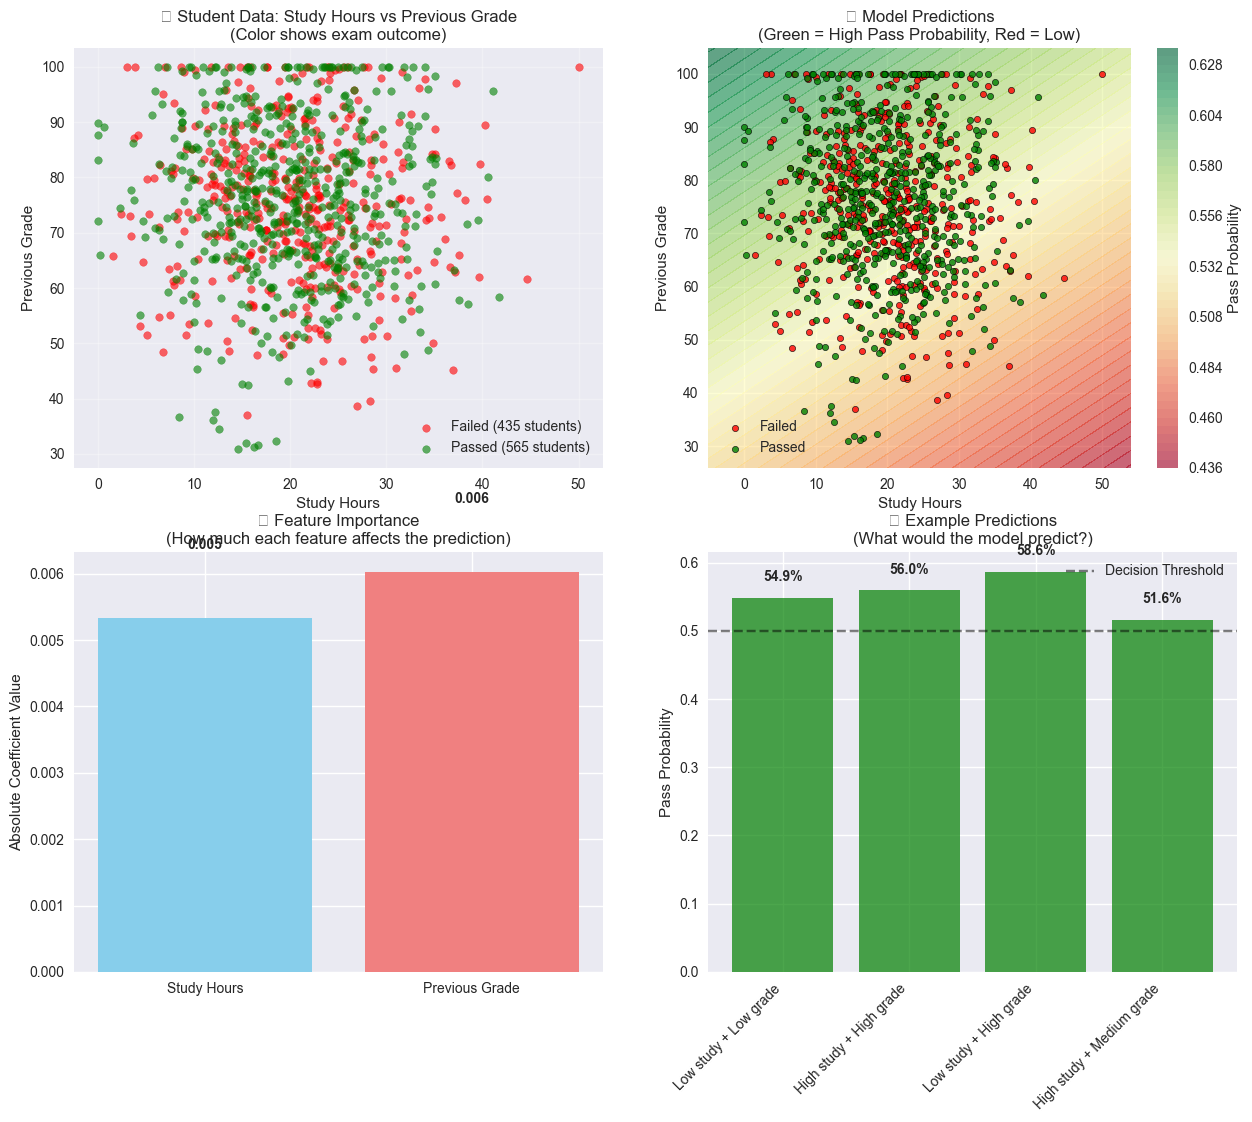

In [38]:
# Let's visualize our results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Raw data distribution
pass_mask = y == 1
fail_mask = y == 0

ax1.scatter(
    X[fail_mask, 0],
    X[fail_mask, 1],
    alpha=0.6,
    c="red",
    label=f"Failed ({fail_mask.sum()} students)",
    s=30,
)
ax1.scatter(
    X[pass_mask, 0],
    X[pass_mask, 1],
    alpha=0.6,
    c="green",
    label=f"Passed ({pass_mask.sum()} students)",
    s=30,
)
ax1.set_xlabel("Study Hours")
ax1.set_ylabel("Previous Grade")
ax1.set_title(
    "📊 Student Data: Study Hours vs Previous Grade\n(Color shows exam outcome)"
)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Model decision boundary
# Create a mesh to plot the decision boundary
h = 1  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on the mesh
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict_proba(mesh_points)[:, 1]  # Probability of passing
Z = Z.reshape(xx.shape)

# Plot decision boundary
contour = ax2.contourf(xx, yy, Z, levels=50, alpha=0.6, cmap="RdYlGn")
ax2.scatter(
    X[fail_mask, 0],
    X[fail_mask, 1],
    alpha=0.8,
    c="red",
    label="Failed",
    s=20,
    edgecolors="black",
    linewidths=0.5,
)
ax2.scatter(
    X[pass_mask, 0],
    X[pass_mask, 1],
    alpha=0.8,
    c="green",
    label="Passed",
    s=20,
    edgecolors="black",
    linewidths=0.5,
)
ax2.set_xlabel("Study Hours")
ax2.set_ylabel("Previous Grade")
ax2.set_title("🎯 Model Predictions\n(Green = High Pass Probability, Red = Low)")
ax2.legend()
plt.colorbar(contour, ax=ax2, label="Pass Probability")

# Plot 3: Feature importance
importance = np.abs(coefficients)
ax3.bar(feature_names, importance, color=["skyblue", "lightcoral"])
ax3.set_title("📊 Feature Importance\n(How much each feature affects the prediction)")
ax3.set_ylabel("Absolute Coefficient Value")
for i, v in enumerate(importance):
    ax3.text(i, v + 0.001, f"{v:.3f}", ha="center", va="bottom", fontweight="bold")

# Plot 4: Prediction examples
examples = [
    [10, 60, "Low study + Low grade"],
    [30, 85, "High study + High grade"],
    [15, 90, "Low study + High grade"],
    [40, 65, "High study + Medium grade"],
]

example_predictions = []
for hours, grade, desc in examples:
    prob = model.predict_proba([[hours, grade]])[0, 1]
    example_predictions.append(prob)

colors = ["red" if p < 0.5 else "green" for p in example_predictions]
bars = ax4.bar(range(len(examples)), example_predictions, color=colors, alpha=0.7)
ax4.set_xticks(range(len(examples)))
ax4.set_xticklabels([ex[2] for ex in examples], rotation=45, ha="right")
ax4.set_ylabel("Pass Probability")
ax4.set_title("🎯 Example Predictions\n(What would the model predict?)")
ax4.axhline(y=0.5, color="black", linestyle="--", alpha=0.5, label="Decision Threshold")
ax4.legend()

# Add value labels on bars
for i, (bar, prob) in enumerate(zip(bars, example_predictions)):
    ax4.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.02,
        f"{prob:.1%}",
        ha="center",
        va="bottom",
        fontweight="bold",
    )

plt.show()

## Why Neural Networks? 🧠

So far we've seen traditional machine learning. But why do we need neural networks and deep learning?

### Traditional ML vs Neural Networks

**Traditional ML (like what we just saw):**

- ✅ Works well for simple patterns
- ✅ Fast to train
- ✅ Interpretable
- ❌ Struggles with complex patterns
- ❌ Requires manual feature engineering
- ❌ Limited by linear or simple non-linear relationships

**Neural Networks:**

- ✅ Can learn extremely complex patterns
- ✅ Automatic feature extraction
- ✅ Works with raw data (images, text, audio)
- ✅ Scales to massive datasets
- ❌ Requires more data
- ❌ Computationally expensive
- ❌ Less interpretable ("black box")

### When to Use Neural Networks?

**Perfect for:**

- 🖼️ **Image recognition**: Identifying objects, faces, medical conditions
- 🗣️ **Speech recognition**: Converting speech to text
- 📝 **Natural language**: Translation, chatbots, sentiment analysis
- 🎮 **Game playing**: Chess, Go, video games
- 🎨 **Creative tasks**: Art generation, music composition
- 🧬 **Complex patterns**: Drug discovery, climate modeling

**Traditional ML might be better for:**

- 📊 Tabular data with clear features
- 🏠 Simple prediction tasks (house prices, basic classification)
- 🔍 When you need interpretability
- ⚡ When you need fast, simple solutions


/Users/karlghosn/Desktop/Programming/Machine Learning/PyTorch - Complete/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/karlghosn/Desktop/Programming/Machine Learning/PyTorch - Complete/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


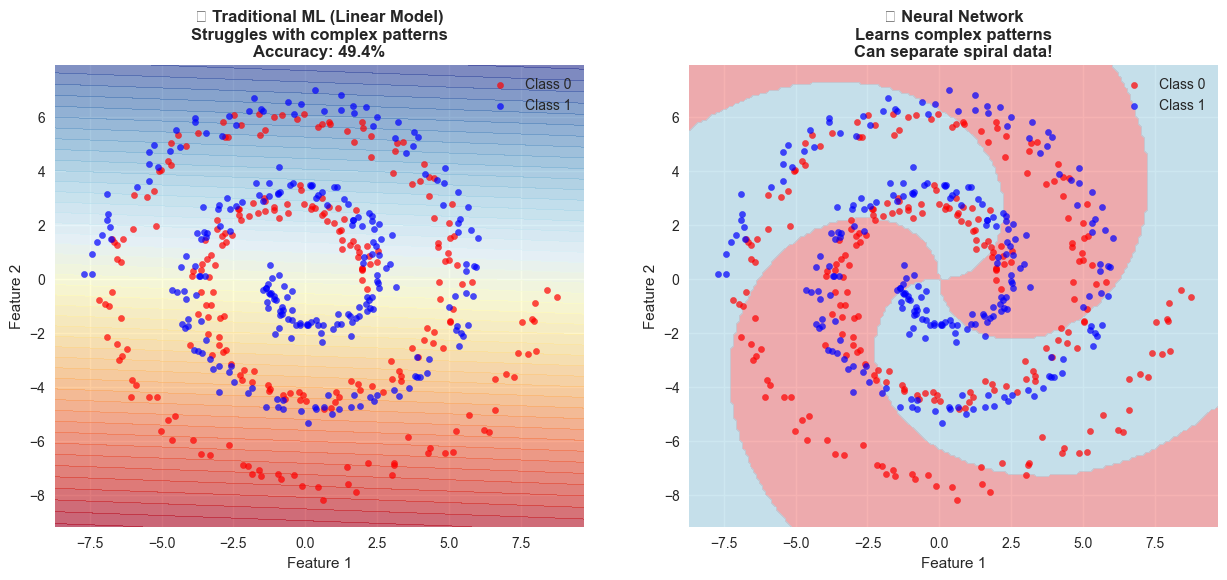

In [39]:
# Let's create a visual comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Create a complex pattern that traditional ML struggles with
np.random.seed(42)
n_points = 500

# Create spiral pattern (complex non-linear)
t = np.linspace(0, 4 * np.pi, n_points // 2)
r1 = 2 + 0.5 * t
r2 = 1 + 0.5 * t

# Spiral 1
x1 = r1 * np.cos(t) + np.random.normal(0, 0.3, len(t))
y1 = r1 * np.sin(t) + np.random.normal(0, 0.3, len(t))
class1 = np.zeros(len(t))

# Spiral 2
x2 = r2 * np.cos(t + np.pi) + np.random.normal(0, 0.3, len(t))
y2 = r2 * np.sin(t + np.pi) + np.random.normal(0, 0.3, len(t))
class2 = np.ones(len(t))

# Combine data
X_spiral = np.vstack([np.column_stack([x1, y1]), np.column_stack([x2, y2])])
y_spiral = np.hstack([class1, class2])

# Traditional ML attempt (Linear model)
linear_model = LogisticRegression(random_state=42)
linear_model.fit(X_spiral, y_spiral)

# Create prediction mesh
h = 0.1
x_min, x_max = X_spiral[:, 0].min() - 1, X_spiral[:, 0].max() + 1
y_min, y_max = X_spiral[:, 1].min() - 1, X_spiral[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Linear model predictions
Z_linear = linear_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z_linear = Z_linear.reshape(xx.shape)

# Plot traditional ML result
ax1.contourf(xx, yy, Z_linear, levels=50, alpha=0.6, cmap="RdYlBu")
scatter1 = ax1.scatter(
    X_spiral[y_spiral == 0, 0],
    X_spiral[y_spiral == 0, 1],
    c="red",
    alpha=0.7,
    s=20,
    label="Class 0",
)
scatter2 = ax1.scatter(
    X_spiral[y_spiral == 1, 0],
    X_spiral[y_spiral == 1, 1],
    c="blue",
    alpha=0.7,
    s=20,
    label="Class 1",
)
ax1.set_title(
    "❌ Traditional ML (Linear Model)\nStruggles with complex patterns\n"
    + f"Accuracy: {linear_model.score(X_spiral, y_spiral):.1%}",
    fontweight="bold",
)
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.legend()

# Simulate what a neural network would do (we'll use a simple trick)
# Create a more complex decision boundary manually to show the concept
# In reality, a neural network would learn this automatically


def neural_network_like_boundary(x, y):
    """Simulate a complex boundary that a neural network might learn"""
    # Convert to polar coordinates
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)

    # Create spiral-like decision boundary
    spiral_condition = np.sin(2 * theta - 0.5 * r) > 0
    return spiral_condition.astype(float)


# Apply to mesh
Z_neural = neural_network_like_boundary(xx, yy)

# Plot neural network result
ax2.contourf(
    xx, yy, Z_neural, levels=[0, 0.5, 1], colors=["lightcoral", "lightblue"], alpha=0.6
)
ax2.scatter(
    X_spiral[y_spiral == 0, 0],
    X_spiral[y_spiral == 0, 1],
    c="red",
    alpha=0.7,
    s=20,
    label="Class 0",
)
ax2.scatter(
    X_spiral[y_spiral == 1, 0],
    X_spiral[y_spiral == 1, 1],
    c="blue",
    alpha=0.7,
    s=20,
    label="Class 1",
)
ax2.set_title(
    "✅ Neural Network\nLearns complex patterns\n" + "Can separate spiral data!",
    fontweight="bold",
)
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
ax2.legend()

plt.show()

## Where PyTorch Fits In 🔥

**PyTorch** is our tool for building and training neural networks. But why PyTorch specifically?

### PyTorch Advantages:

1. **🐍 Pythonic**: Feels natural if you know Python
2. **🔄 Dynamic**: Can change your network during runtime
3. **🔧 Flexible**: Easy to experiment and debug
4. **🚀 Fast**: Optimized for both research and production
5. **🤝 Popular**: Large community, lots of tutorials and pre-trained models
6. **🎓 Research-Friendly**: Preferred by many top AI research labs

### What We'll Learn in This Course:

1. **Tensor Basics** → The fundamental data structure
2. **Automatic Differentiation** → How PyTorch computes gradients
3. **Neural Network Building** → Creating models layer by layer
4. **Training Loops** → Teaching models to learn from data
5. **Real Applications** → Computer vision, NLP, and more!


## Summary & Next Steps 📝

Congratulations! You've completed your introduction to machine learning. Here's what you learned:

### 🎯 Key Takeaways:

1. **Machine Learning vs Traditional Programming**:

   - Traditional: Write rules manually
   - ML: Learn rules from data

2. **Three Types of ML**:

   - **Supervised**: Learn from labeled examples
   - **Unsupervised**: Find hidden patterns
   - **Reinforcement**: Learn through trial and error

3. **The ML Workflow**:

   - Problem → Data → Preprocessing → Model → Training → Evaluation → Deployment

4. **When to Use Neural Networks**:

   - Complex patterns (images, text, speech)
   - Large datasets
   - When you can sacrifice interpretability for performance

5. **Why PyTorch**:
   - Pythonic, flexible, and powerful
   - Great for both research and production

### 🚀 What's Next?

In the next notebook, we'll dive into PyTorch fundamentals:

- Installing and setting up PyTorch
- Understanding tensors (the building blocks)
- Basic operations and device management
- Your first neural network!

### 🎓 Remember:

- Machine learning is a tool, not magic
- Start simple, then add complexity
- Practice makes perfect!
- Don't be afraid to experiment

**Ready for the next adventure? Let's move to [01. PyTorch Fundamentals](01_pytorch_fundamentals.ipynb)!** 🔥
